In [9]:
from sklearn.datasets import make_circles, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [10]:
# создаем датасеты

X1, y1 = make_circles(
    n_samples=500,
    noise=0.05,
    random_state=8,
)

X2, y2 = make_gaussian_quantiles(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    
)

X1_tr, X1_t, y1_tr, y1_t = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=8)
X2_tr, X2_t, y2_tr, y2_t = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=8)


In [33]:
# опишем функцию для вывода результата классификации
def plot_result(kernel, X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, **kwargs):

    def compute_points(kernel, X_tr, y_tr, X_t, y_t, **kwargs):
        svc = svm.SVC(kernel=kernel, **kwargs).fit(X_tr, y_tr)
        y_pred = svc.predict(X_t)
        # теперь нужно нарисовать все классифицированные точки
        # те, на которых модель ошиблась, выделяем красным
    
        # все точки первого класса
        cl_1_x = [X_t[i][0] for i in range(len(X_t)) if y_t[i] == 0 and y_pred[i] == 0]
        cl_1_y = [X_t[i][1] for i in range(len(X_t)) if y_t[i] == 0 and y_pred[i] == 0]
    
        # все точки второго класса
        cl_2_x = [X_t[i][0] for i in range(len(X_t)) if y_t[i] == 1 and y_pred[i] == 1]
        cl_2_y = [X_t[i][1] for i in range(len(X_t)) if y_t[i] == 1 and y_pred[i] == 1]
    
        # все неверно классифицированные точки
        err_x = [X_t[i][0] for i in range(len(X_t)) if y_t[i] != y_pred[i]]
        err_y = [X_t[i][1] for i in range(len(X_t)) if y_t[i] != y_pred[i]]
    
        # посчитаем точность на тестовых данных
        accuracy = (len(X_t) - len(err_x)) / len(X_t) * 100
        return cl_1_x, cl_1_y, cl_2_x, cl_2_y, err_x, err_y, accuracy

    # сначала для кругов
    cir_cl1_x, cir_cl1_y, cir_cl2_x, cir_cl2_y, cir_err_x, cir_err_y, cir_acc = compute_points(kernel, X1_tr, y1_tr, X1_t, y1_t, **kwargs)

    # для квантилий
    q_cl1_x, q_cl1_y, q_cl2_x, q_cl2_y, q_err_x, q_err_y, q_acc = compute_points(kernel, X2_tr, y2_tr, X2_t, y2_t, **kwargs)

    print(f'Accuracy for circles is {cir_acc}%')
    print(f'Accuracy for quantiles is {q_acc}%')
    
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # выводим точки первого класса
    ax1.scatter(cir_cl1_x, cir_cl1_y, c='#00ff00')

    # второго класса
    ax1.scatter(cir_cl2_x, cir_cl2_y, c='#0000ff')

    # неправильно классифицированные точки
    ax1.scatter(cir_err_x, cir_err_y, c='#ff0000')

    ax1.set(xlabel='feature 1', ylabel='feature 2')
    
    # для других данных
    ax2.scatter(q_cl1_x, q_cl1_y, c='#00ff00')
    ax2.scatter(q_cl2_x, q_cl2_y, c='#0000ff')
    # неправильно классифицированные точки
    ax2.scatter(q_err_x, q_err_y, c='#ff0000')
    ax2.set(xlabel='feature 1', ylabel='feature 2')

Линейное ядро
Accuracy for circles is 42.66666666666667%
Accuracy for quantiles is 56.99999999999999%


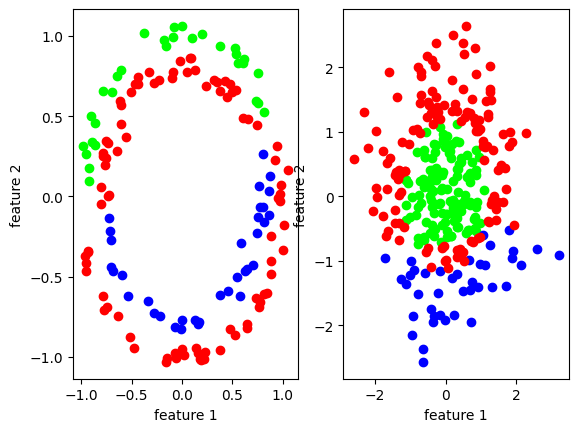

In [34]:
# разные ядра на кругах
print('Линейное ядро')
plot_result('linear', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t)

Полиномиальное ядро
степень 1
Accuracy for circles is 42.66666666666667%
Accuracy for quantiles is 56.666666666666664%


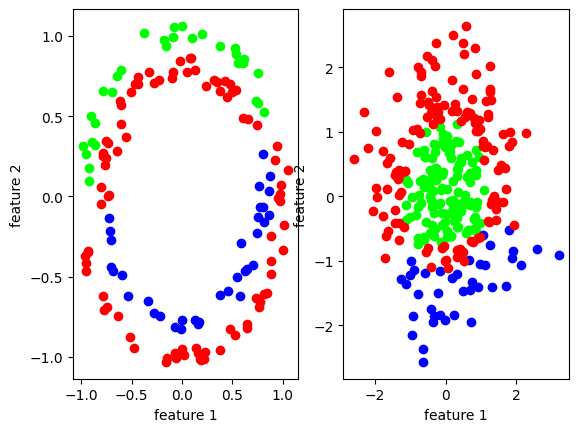

In [35]:
print('Полиномиальное ядро')
print('степень 1')
plot_result('poly', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, degree=1)

степень 2
Accuracy for circles is 100.0%
Accuracy for quantiles is 99.33333333333333%


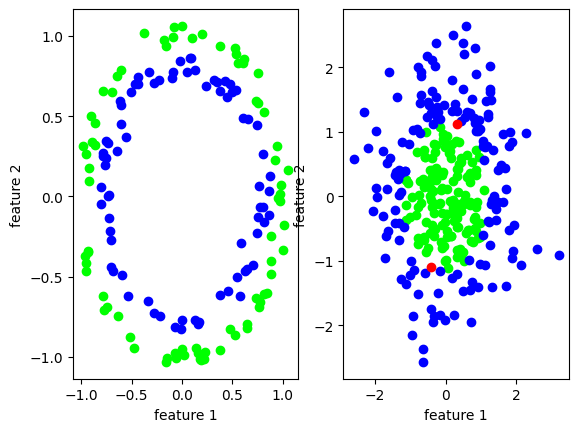

In [36]:
print('степень 2')
plot_result('poly', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, degree=2)

степень 3
Accuracy for circles is 48.66666666666667%
Accuracy for quantiles is 54.333333333333336%


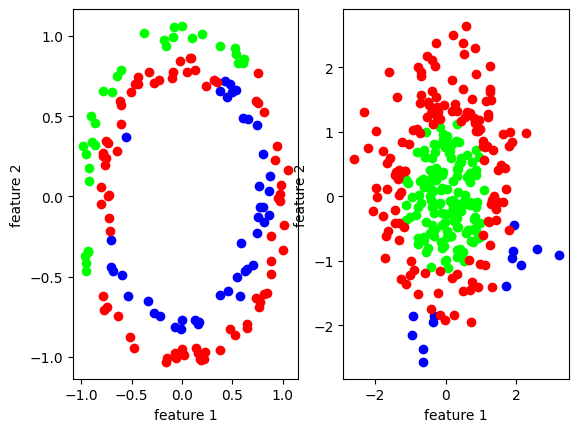

In [37]:
print('степень 3')
plot_result('poly', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, degree=3)

степень 10
Accuracy for circles is 100.0%
Accuracy for quantiles is 97.33333333333334%


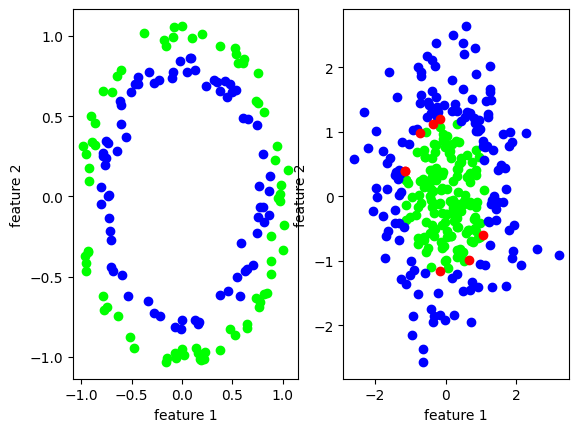

In [38]:
print('степень 10')
plot_result('poly', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, degree=10)

rbf-ядро (Гауссово)
gamma = 0.7
Accuracy for circles is 100.0%
Accuracy for quantiles is 98.33333333333333%


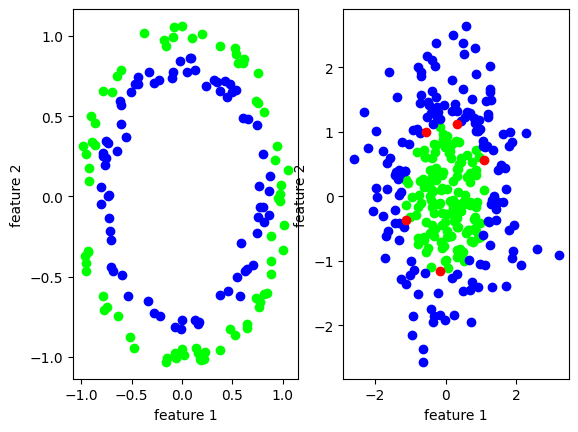

In [39]:
print('rbf-ядро (Гауссово)')
print('gamma = 0.7')
plot_result('rbf', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, gamma=0.7)

gamma = 0.3
Accuracy for circles is 100.0%
Accuracy for quantiles is 97.66666666666667%


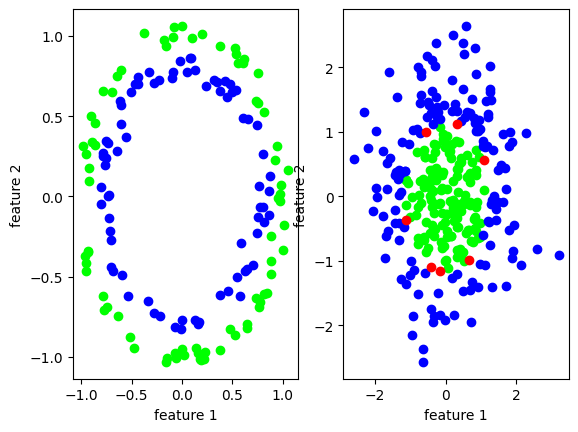

In [40]:
print('gamma = 0.3')
plot_result('rbf', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, gamma=0.3)

gamma = 0.001
Accuracy for circles is 42.0%
Accuracy for quantiles is 59.0%


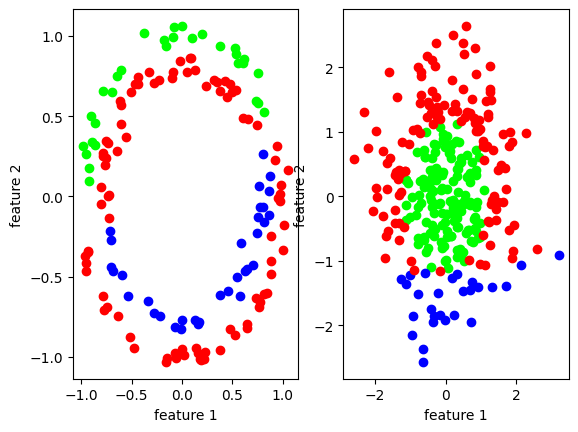

In [41]:
print('gamma = 0.001')
plot_result('rbf', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1, gamma=0.001)

Сигмоидальное ядро
Accuracy for circles is 48.66666666666667%
Accuracy for quantiles is 56.99999999999999%


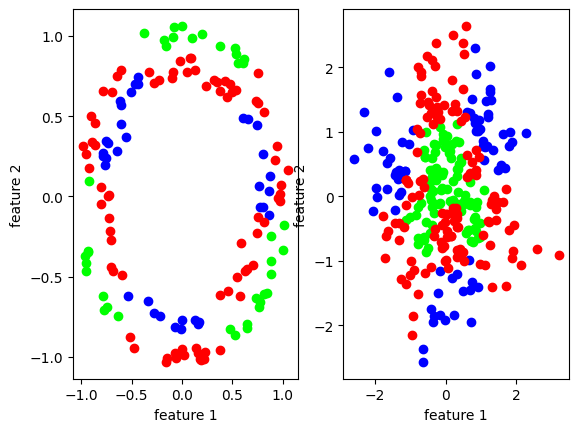

In [42]:
print('Сигмоидальное ядро')
plot_result('sigmoid', X1_tr, y1_tr, X1_t, y1_t, X2_tr, y2_tr, X2_t, y2_t, C=1)